In [2653]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.pyplot as plt

#1.Load the data file using pandas.

In [2654]:
GPS= pd.read_csv('googleplaystore.csv')

In [2655]:
GPS.shape

(10841, 13)

In [2656]:
GPS.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

 #2.Check for null values in the data. Get the number of null values for each column.

In [2657]:
GPS.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#3.Drop records with nulls in any of the columns.

In [2658]:
GPS.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2659]:
GPS1=GPS.dropna()

In [2660]:
GPS1.shape

(9360, 13)

In [2661]:
GPS1=GPS1.drop_duplicates()

In [2662]:
GPS1.shape

(8886, 13)

In [2663]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2664]:
type(GPS1)

pandas.core.frame.DataFrame

In [2665]:
GPS1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

4.1-Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [2666]:
GPS1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [2667]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k' in size:
        x= size[:-1]
        x=float(x)
        return(x)
    else:
        return None
        

    

In [2668]:
GPS1['Size'] = GPS1['Size'].map(change_size)

In [2669]:
GPS1.fillna(method='bfill',inplace=True)

In [2670]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2671]:
GPS1.describe()

,Rating,Size
count,8886.000000,8886.000000
mean,4.187959,23087.627560
std,0.522428,23492.832779
min,1.000000,8.500000
25%,4.000000,5400.000000
50%,4.300000,14000.000000
75%,4.500000,33000.000000
max,5.000000,100000.000000


In [2672]:
GPS1.shape

(8886, 13)

In [2673]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2674]:
GPS1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

#4.3Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [2675]:
GPS1['Reviews']=pd.to_numeric(GPS1['Reviews'])

In [2676]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2677]:
GPS1["Installs"] = GPS1['Installs'].str[:-1]

In [2678]:
GPS1['Installs'] = GPS1['Installs'].apply(lambda x: x.replace(",",""))

In [2679]:
GPS1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2680]:
GPS1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9490,WiFi Tether Router,COMMUNICATION,4.2,5599,1300.0,100000,Paid,$2.90,Everyone,Communication,"July 2, 2018",6.2.7,1.6 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15000.0,100000,Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
489,"Moco - Chat, Meet People",DATING,4.2,313724,40000.0,10000000,Free,0,Mature 17+,Dating,"August 4, 2018",2.6.141,4.1 and up
4656,U+Box,PRODUCTIVITY,3.8,24517,22000.0,10000000,Free,0,Everyone,Productivity,"May 23, 2018",4.2.17,5.0 and up
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100000.0,1000000,Paid,$0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up


In [2681]:
GPS1.Installs.value_counts()

1000000       1485
10000000      1132
100000        1110
10000          988
1000           697
5000000        683
500000         515
50000          461
5000           425
100000000      369
100            303
50000000       272
500            199
10              69
500000000       61
50              56
1000000000      49
5                9
1                3
Name: Installs, dtype: int64

In [2682]:
GPS1['Installs'] = GPS1['Installs'].astype(int)

In [2683]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric. 

In [2684]:
GPS1['Price'] = GPS1['Price'].apply(lambda x: x.replace("$",""))

In [2685]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2686]:
GPS1['Price'] = GPS1['Price'].astype(float)

In [2687]:
GPS1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [2688]:
GPS1.shape

(8886, 13)

#5.Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [2689]:
GPS1.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8886, dtype: float64

In [2690]:
GPS1[GPS1.Rating<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [2691]:
GPS1[GPS1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [2692]:
GPS1[GPS1.Reviews>GPS1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,196.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [2693]:
GPS1.drop(GPS1[GPS1.Reviews>GPS1.Installs].index, inplace=True)

In [2694]:
GPS1[GPS1.Reviews>GPS1.Installs].shape

(0, 13)

In [2695]:
GPS1.shape

(8879, 13)

In [2696]:
GPS1[(GPS1.Price>0) & (GPS1.Type=='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [2697]:
GPS1.shape

(8879, 13)

#5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

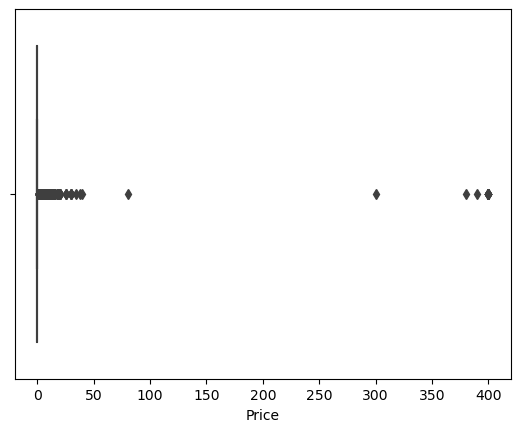

In [2698]:
#Boxplot for Price

sns.boxplot(GPS1["Price"])

In [2699]:
# Based on the above plot we can assume that while many apps are available for less than $50.00, few apps are costlier and are above $300.00

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

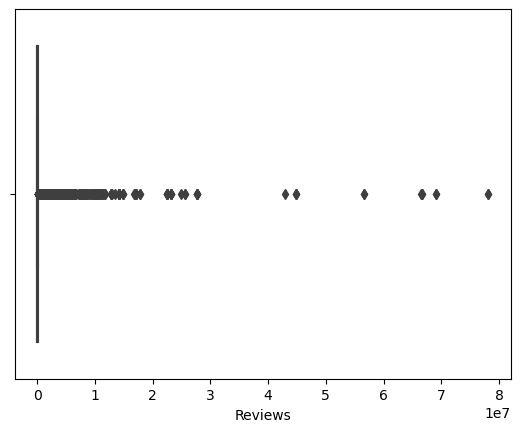

In [2700]:
#Boxplot for Reviews

sns.boxplot(GPS1["Reviews"])

In [2701]:
#Yes there are few apps that are having enormous reviews irrespective of their installs

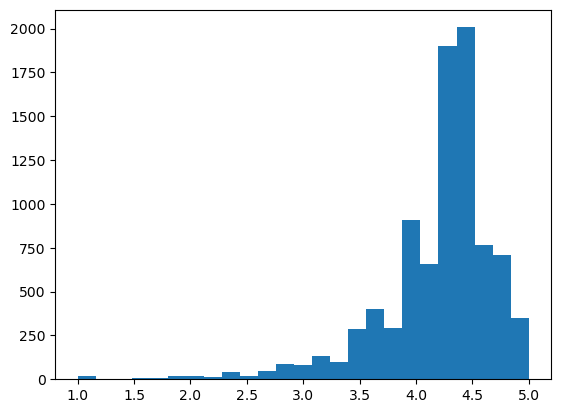

In [2702]:
#Histogram for Ratings

plt.hist(GPS1.Rating, bins=25)
plt.show()

In [2703]:
#The ratings are mostly ranged between 3.5 to 4.5

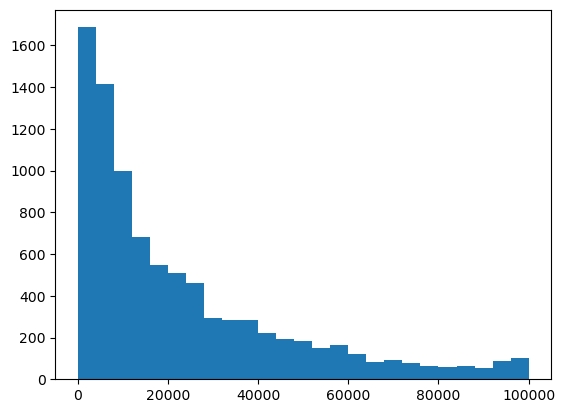

In [2704]:
#Histogram for Size

plt.hist(GPS1.Size, bins=25)
plt.show()

In [2705]:
# Both plots have outliers

In [2706]:
GPS1.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839    19000.0
10840    19000.0
Name: Size, Length: 8879, dtype: float64

#6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [2707]:
GPS1.drop(GPS1[GPS1.Price>=200].index, inplace=True)

In [2708]:
GPS1.shape

(8864, 13)

In [2709]:
GPS1.drop(GPS1[GPS1.Reviews>=2000000].index, inplace=True)

In [2710]:
GPS1.shape

(8456, 13)

In [2711]:
GPS1.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,        100,        500,         10,
                5,         50,  500000000])

In [2712]:
GPS1.shape

(8456, 13)

In [2713]:
GPS1.Installs.quantile([.1,.25,.5,.7,.75,.9,.95,.99])

0.10         1000.0
0.25        10000.0
0.50       100000.0
0.70      1000000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [2714]:
Q1, Q3=GPS1.Installs.quantile([.25,.75])

In [2715]:
Q1

10000.0

In [2716]:
Q3

5000000.0

In [2717]:
IQR=Q3-Q1

In [2718]:
IQR

4990000.0

In [2719]:
O_H=Q3+1.5*IQR
O_L=Q1-1.5*IQR

In [2720]:
O_H

12485000.0

In [2721]:
O_L

-7475000.0

In [2722]:
GPS1.drop(GPS1[GPS1.Installs>=O_H].index, inplace=True)

In [2723]:
GPS1.shape

(8100, 13)

#7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Price'>

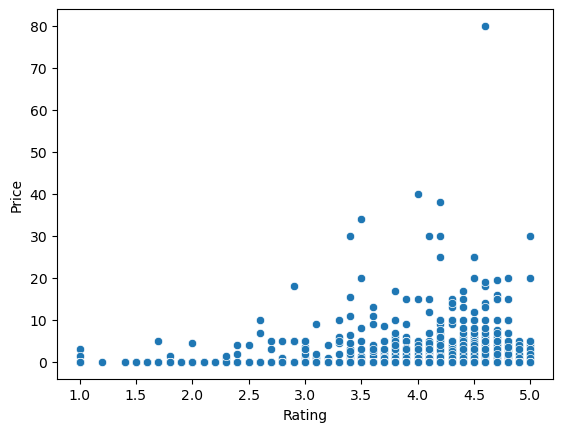

In [2724]:
sns.scatterplot(GPS1.Rating,GPS1.Price)

In [2725]:
#Yes ratings does tend to increase based on the price of the apps

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Size'>

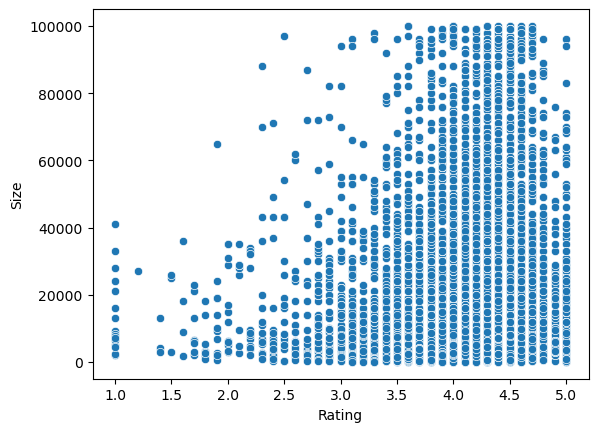

In [2726]:
sns.scatterplot(GPS1.Rating,GPS1.Size)

In [2727]:
# The app with larger size are haveing better ratings than the smaller ones

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

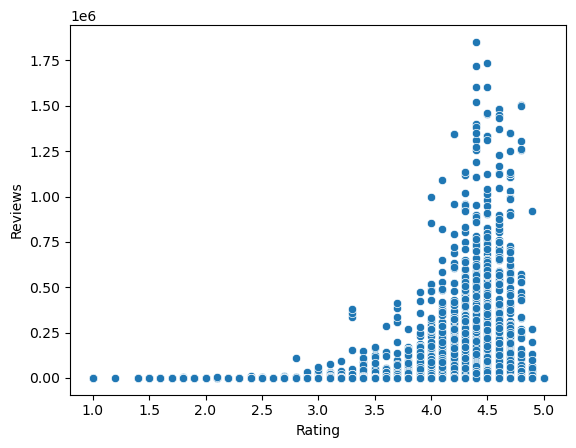

In [2728]:
sns.scatterplot(GPS1.Rating,GPS1.Reviews)

In [2729]:
# The ratings of an app is always directly proportinal to the reviews, hence more the review beter the ratings

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

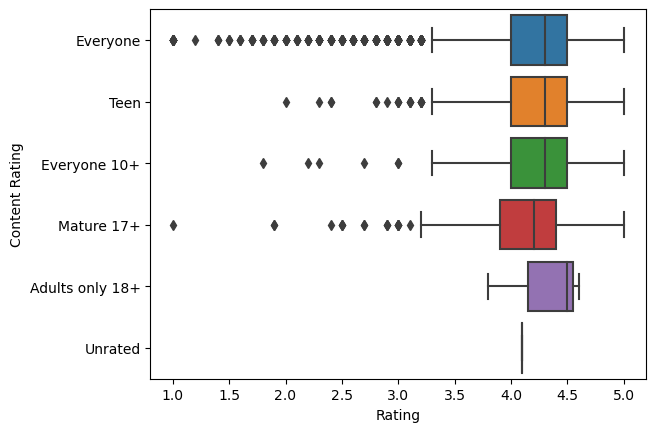

In [2730]:
sns.boxplot(GPS1.Rating,GPS1['Content Rating'])

In [2731]:
#Apps for 'everyone' has more bad ratings than other sections as it has so much outliers, while 18+ apps have better ratings.

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

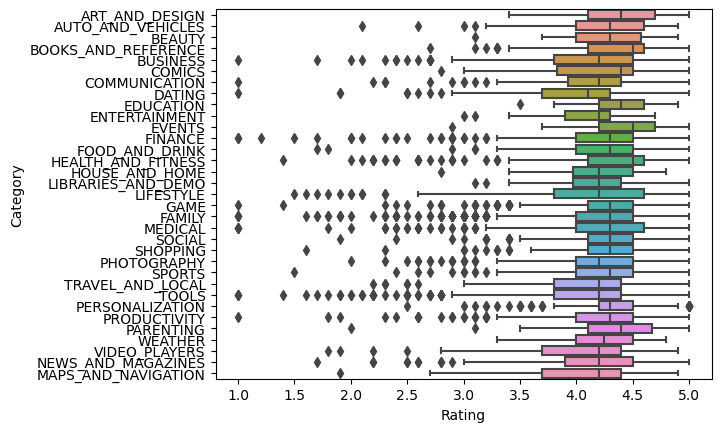

In [2732]:
sns.boxplot(GPS1.Rating,GPS1.Category)

In [2733]:
#With less Outlier value,Events category has best ratings compare to others.

#8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


In [2734]:
inp1=GPS1.copy()

In [2735]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [2736]:
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [2737]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [2738]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [2739]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [2740]:
inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1, inplace=True)

In [2741]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [2742]:
inp1.shape

(8100, 9)

In [2743]:
inp2=inp1.copy()
inp2.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [2744]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [2745]:
inp2.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [2746]:
inp2.Genres.value_counts().head(40)

Tools                      672
Entertainment              468
Education                  446
Finance                    306
Medical                    301
Lifestyle                  296
Personalization            289
Action                     277
Sports                     276
Productivity               276
Business                   261
Health & Fitness           257
Photography                238
Communication              238
News & Magazines           206
Social                     205
Travel & Local             188
Simulation                 184
Shopping                   178
Books & Reference          170
Dating                     159
Arcade                     149
Casual                     142
Video Players & Editors    133
Maps & Navigation          118
Food & Drink               106
Role Playing               103
Puzzle                      97
Strategy                    81
Auto & Vehicles             73
Adventure                   70
Weather                     70
Racing  

In [2747]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [2748]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<100:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [2749]:
inp2.Genres.value_counts().head(40)

Other                      1458
Tools                       672
Entertainment               468
Education                   446
Finance                     306
Medical                     301
Lifestyle                   296
Personalization             289
Action                      277
Productivity                276
Sports                      276
Business                    261
Health & Fitness            257
Communication               238
Photography                 238
News & Magazines            206
Social                      205
Travel & Local              188
Simulation                  184
Shopping                    178
Books & Reference           170
Dating                      159
Arcade                      149
Casual                      142
Video Players & Editors     133
Maps & Navigation           118
Food & Drink                106
Role Playing                103
Name: Genres, dtype: int64

In [2750]:
inp2.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [2751]:
dummy = pd.get_dummies(inp2[['Category','Type','Content Rating','Genres']])

In [2752]:
dummy.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Genres_Photography,Genres_Productivity,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2753]:
inp2.drop(['Category','Type','Genres','Content Rating'], axis=1, inplace=True)

In [2754]:
inp2=pd.concat([inp2,dummy],axis=1)

In [2755]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Photography,Genres_Productivity,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2756]:
inp2.shape

(8100, 74)

In [2757]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Photography,Genres_Productivity,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2758]:
inp2.shape

(8100, 74)

In [2759]:
inp2.isnull().sum()

Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
                                 ..
Genres_Social                     0
Genres_Sports                     0
Genres_Tools                      0
Genres_Travel & Local             0
Genres_Video Players & Editors    0
Length: 74, dtype: int64

In [2760]:
inp2.to_csv('Testfile.csv')

#9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [2761]:
df_train,df_test = tts(inp2,train_size=0.7,random_state=571)

In [2762]:
df_train.shape

(5670, 74)

In [2763]:
df_test.shape

(2430, 74)

#10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [2764]:
X_train=df_train.drop('Rating',axis=1)
y_train=df_train[['Rating']]
X_test=df_test.drop('Rating',axis=1)
y_test=df_test[['Rating']]

In [2765]:
X_train

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Photography,Genres_Productivity,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
2817,9.244742,11000.0,13.815512,0.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2301,5.370638,68000.0,6.908755,33.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10293,3.044522,4800.0,6.216606,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,11.221182,17000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4544,5.135798,7700.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,10.385883,28000.0,13.815512,0.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1854,13.009049,52000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7564,8.925321,4000.0,13.122365,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5908,5.010635,2800.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2766]:
y_train

,Rating
2817,4.5
2301,3.5
10293,4.3
1904,4.4
4544,3.9
...,...
2807,4.1
1854,4.5
7564,4.4
5908,2.1


In [2767]:
X_test

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Photography,Genres_Productivity,Genres_Role Playing,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors
5374,7.180831,57000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
428,12.158006,11000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2686,12.052834,12000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1428,8.443116,40000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4311,5.075174,13000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,9.834941,23000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8923,5.774552,914.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,8.341887,24000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5598,13.017034,37000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2768]:
y_test

,Rating
5374,4.2
428,4.2
2686,4.2
1428,4.6
4311,4.3
...,...
2312,4.7
8923,4.1
494,4.2
5598,4.4


#11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [2769]:
Reg=LR()

In [2770]:
Reg.fit(X_train,y_train)

LinearRegression()

In [2771]:
y_pred_train=Reg.predict(X_train)

In [2772]:
y_pred_train

array([[4.0620253 ],
       [4.26328016],
       [4.16004741],
       ...,
       [4.30258098],
       [3.76192841],
       [4.09856752]])

In [2773]:
Error_train=y_pred_train-y_train

In [2774]:
Error_train

,Rating
2817,-0.437975
2301,0.763280
10293,-0.139953
1904,-0.502601
4544,0.327560
...,...
2807,0.149554
1854,-0.111735
7564,-0.097419
5908,1.661928


In [2775]:
y_pred_train=pd.DataFrame(y_pred_train,columns=['y_pred_train'])

In [2776]:
y_pred_train

,y_pred_train
0,4.062025
1,4.263280
2,4.160047
3,3.897399
4,4.227560
...,...
5665,4.249554
5666,4.388265
5667,4.302581
5668,3.761928


In [2777]:
y_train

,Rating
2817,4.5
2301,3.5
10293,4.3
1904,4.4
4544,3.9
...,...
2807,4.1
1854,4.5
7564,4.4
5908,2.1


In [2778]:
Error_train.columns=['Rating_Differences']

In [2779]:
Error_train

,Rating_Differences
2817,-0.437975
2301,0.763280
10293,-0.139953
1904,-0.502601
4544,0.327560
...,...
2807,0.149554
1854,-0.111735
7564,-0.097419
5908,1.661928


In [2780]:
Predictions_train_data=pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True),y_pred_train.reset_index(drop=True),Error_train.reset_index(drop=True)],axis=1)

In [2781]:
Predictions_train_data

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Rating,y_pred_train,Rating_Differences
0,9.244742,11000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.5,4.062025,-0.437975
1,5.370638,68000.0,6.908755,33.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.5,4.263280,0.763280
2,3.044522,4800.0,6.216606,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.3,4.160047,-0.139953
3,11.221182,17000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.4,3.897399,-0.502601
4,5.135798,7700.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.9,4.227560,0.327560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,10.385883,28000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.1,4.249554,0.149554
5666,13.009049,52000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.5,4.388265,-0.111735
5667,8.925321,4000.0,13.122365,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.4,4.302581,-0.097419
5668,5.010635,2800.0,10.819798,0.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2.1,3.761928,1.661928


In [2782]:
Predictions_train_data.to_csv('Predictions_train_data')

In [2783]:
from math import sqrt

In [2784]:
MeanSquaredError = mse(y_train,y_pred_train)
print('Mean Squared Error :',MeanSquaredError)

Mean Squared Error : 0.2451861068518001


In [2785]:
RMSE = sqrt(MeanSquaredError)
print('Root Mean Squared Error :',RMSE)

Root Mean Squared Error : 0.49516270745261104


In [2786]:
from sklearn.metrics import r2_score

In [2787]:
R2_train=r2_score(y_train,y_pred_train)
print('R2 score:',R2_train)

R2 score: 0.1479286210737064


#12. Make predictions on test set and report R2.

In [2788]:
y_pred_test=Reg.predict(X_test)

In [2789]:
y_pred_test

array([[4.00692   ],
       [4.1869549 ],
       [4.29599228],
       ...,
       [4.10472158],
       [4.47401409],
       [3.99251925]])

In [2790]:
Error_test=y_pred_test-y_test

In [2791]:
Error_test

,Rating
5374,-0.193080
428,-0.013045
2686,0.095992
1428,-0.196912
4311,-0.135653
...,...
2312,-0.415978
8923,-0.104962
494,-0.095278
5598,0.074014


In [2792]:
y_pred_test=pd.DataFrame(y_pred_test,columns=['y_pred_test'])

In [2793]:
y_pred_test

,y_pred_test
0,4.006920
1,4.186955
2,4.295992
3,4.403088
4,4.164347
...,...
2425,4.284022
2426,3.995038
2427,4.104722
2428,4.474014


In [2794]:
Predictions_test_data=pd.concat([X_test.reset_index(drop=True),y_test.reset_index(drop=True),y_pred_test.reset_index(drop=True),Error_test.reset_index(drop=True)],axis=1)

In [2795]:
Predictions_test_data

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Shopping,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Rating,y_pred_test,Rating
0,7.180831,57000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.2,4.006920,-0.193080
1,12.158006,11000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.2,4.186955,-0.013045
2,12.052834,12000.0,16.118096,0.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4.2,4.295992,0.095992
3,8.443116,40000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.6,4.403088,-0.196912
4,5.075174,13000.0,9.210440,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.3,4.164347,-0.135653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,9.834941,23000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.7,4.284022,-0.415978
2426,5.774552,914.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.1,3.995038,-0.104962
2427,8.341887,24000.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.2,4.104722,-0.095278
2428,13.017034,37000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.4,4.474014,0.074014


In [2796]:
Predictions_test_data.to_csv('Predictions_test_data')

In [2797]:
MeanSquaredError = mse(y_test,y_pred_test)
print('Mean Squared Error :',MeanSquaredError)

Mean Squared Error : 0.25742539830478345


In [2798]:
RMSE = sqrt(MeanSquaredError)
print('Root Mean Squared Error :',RMSE)

Root Mean Squared Error : 0.507371065695299


In [2799]:
R2_train=r2_score(y_test,y_pred_test)
print('R2 score:',R2_train)

R2 score: 0.13985067859635103
